# Chapter 1: Tossing a Coin

### 1.1 The Game

Chapter 1 opens up with The Game:
>Imagine we offer you the following game: we toss a coin, and if it comes up heads we increase your monetary wealth by 50%; if it comes up tails we reduce your weath by 40%.

Concluding the games introduction with the question:
>Would you accept the rules of our game? would you submit your wealth to the dynamic out game will impose on it?

In my head, I immediately rephrased the question to "on average, what will happen to my money?" However, before the notes can explore the various metrics to assess the dynamics according to the rules of the game, the rules of the game must be translated into mathematical objects.

**Time**: lowercase $t$.  
**Wealth**: $x(t)$, where $x$ is your wealth at a certain time $t$.  
**Duration**: The symbol $\delta t$ denotes duration--that is, a change ($\delta$), over time ($t$).  
**Wealth Factor**: $r(t)$, where, again, $t$ is time, but $r_i \in \{0.6, 1.5\}$, each with probability $\frac{1}{2}$. To be explicit, $r_1 = 0.60$ or 40% *decrease* and $r_2 = 1.5$, or 50% *increase*.

$$
r(t) = 
\begin{cases} 
0.6 \text{, with probability } \frac{1}{2}\\
1.5 \text{, with probability } \frac{1}{2}\\
\end{cases}
$$

Lastly, we can create the model:
$$x(t) = r(t)x(t-\delta t)$$

A few first runs of it on paper can be done, assuming randomly selected values of $r(t)$:  
$\delta t = 1$  
$x(0) = 1$  
$$x(0) = 1$$
$$x(1) = 0.6 x(0)$$
$$x(1) = 0.6$$
$$x(2) = 1.5 x(1)$$
$$x(2) = 1.5 \times 0.6$$
$$x(2) = 0.9$$
$$...\text{and so on.}$$

#### Figure 1

The first section concludes with one path of wealth over time (**Figure 1**), specifically 52 time steps, or one year if each time step ($\delta t$) is a week. **Figure 1** is reproduced below.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def wealthDynamics(initial_wealth, wealth_factors, duration=1):
    '''
    Create one trajectory of wealth.
    '''
    factors = np.random.choice(a=wealth_factors[0], p=wealth_factors[1], size=duration)
    wealth_trajectory = [initial_wealth]

    #At each interval, calculate a new wealth value as the previous wealth value multiplied by a factor.
    for interval in range(0, duration-1):
        increment_wealth = wealth_trajectory[interval]*factors[interval]
        wealth_trajectory.append(increment_wealth)

    return wealth_trajectory

In [3]:
wealth_trajectory = wealthDynamics(initial_wealth=1, wealth_factors=[[0.6,1.5],[0.5,0.5]], duration=52)

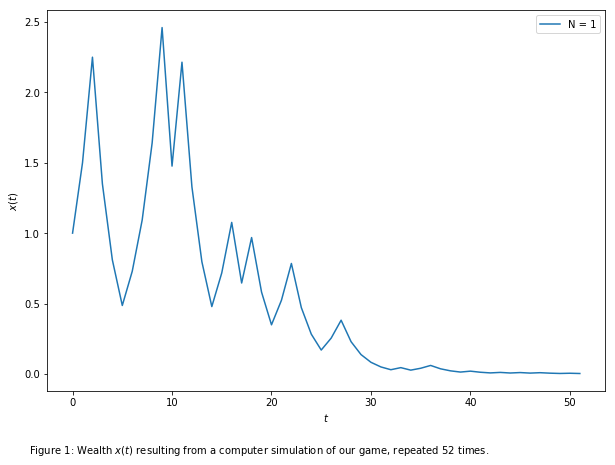

In [4]:
#Declare figure and subplots.
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)

#Plot the one wealth trajectory.
ax.plot(wealth_trajectory)

#Set axes labels.
ax.set_ylabel('$x(t)$')
ax.set_xlabel('$t$')

#Create legend.
ax.legend(['N = 1'])

#Set figure text.
fig.text(0.1, 0.0,
         'Figure 1: Wealth $x(t)$ resulting from a computer simulation of our game, repeated 52 times.',
         horizontalalignment='left', fontsize=10)

#Show figure.
plt.show()

### 1.1.1 Averaging over many trials

This subsection opens up with a comment on noise and how averages have been used to get rid of noise and measure signal. I never thought about averages that way. In my training in statistics, the average was billed as the "most likely" outcome and therefore should be the one you expect. The idea that averages *reduce the noise* when compiling realizations of a distribution tied a few knots together.

> A single trajectory doesn't tell us much about overall tendencies. There is too much noise to discern a clear signal. A common strategy for getting rid of noise is to try again. And then try again and again, and look at what happens on average.

The first average explored is called the **finite-ensemble average**. Calculating the ensemble average is as follows. At each time interval, we average the wealth of the entire population (all trajectories at a specific time $t$). The trajectory of this average for each time interval could tell us more about the wealth process.

**Finite-ensemble average and notation**:
$$\langle z(t) \rangle_{N} = \frac{1}{N}\sum_{i=1}^{N} z_i(t),$$ where $i$ indexes a particular realization of $z(t)$ and $N$ is the number of realizations included in the average.

To breakdown this notation further, imagine you have only one trajectory, like we simulated above. In this very simplistic case, $N = 1$ and $\langle z(t) \rangle_{1} = \sum_{i=1}^{1} z_1(t)$. Every value of $z(t)$ is an average of all of the trajectories at time $t$, which in this case we know there is only 1 path. Therefore, $z(1) = z_1(1) / 1$

Quickly expand this to two simulated paths, that is, $N = 2$. Every realization of $z(t)$ is an average of all of the trajectories at time $t$, which in this case there are 2 paths. Therefore $z(1) = (z_1(1) + z_2(1)) / 2$.

#### Figure 2

To create this figure, first, we need to expand the simulation to generate multiple trajectories, not just one trajectory. Second, at each time $t$, we must average all of the trajectories to one quantity, and it is that number which is plotted. Third, we will want to run that process for four different numbers of trajectories, 1, 100, 1,000, and 1,000,000. In the plot using 1,000,000 trajectories, each value at $t$ is an average of all 1,000,000 trajectories at each time interval $t$.

In [5]:
def wealthDynamics(initial_wealth, wealth_factors, duration=1, num_trajectories=1):
    '''
    Create one trajectory of wealth.
    '''
    all_wealth_trajectories = []
    
    #Calculate a wealth trajectory for a user-defined number of trajectories.
    for ensemble in range(0,num_trajectories):
        factors = np.random.choice(a=wealth_factors[0], p=wealth_factors[1], size=duration)
        wealth_trajectory = [initial_wealth]

        #At each interval, calculate a new wealth value as the previous wealth value multiplied by a factor.
        for interval in range(0, duration-1):
            increment_wealth = wealth_trajectory[interval]*factors[interval]
            wealth_trajectory.append(increment_wealth)

        all_wealth_trajectories.append(wealth_trajectory)
        
    return all_wealth_trajectories

In [6]:
num_trajectories = [1, 100, 10000, 1000000]

ensemble_average_trajectories = []

#For each ensemble size, 1, 100, 1000, etc., calculate an average of wealth at each time interval.
for size in num_trajectories:
    trajectories = wealthDynamics(initial_wealth=1, wealth_factors=[[0.6,1.5],[0.5,0.5]],
                                  duration=52,
                                  num_trajectories=size)

    #Transpose and calculate averages at each time interval.
    trajectories = np.array(list(zip(*traj)))
    
    ensemble_average = []

    for trajectory in trajectories:
        ensemble_average.append(trajectory.mean())

    ensemble_average_trajectories.append(ensemble_average)

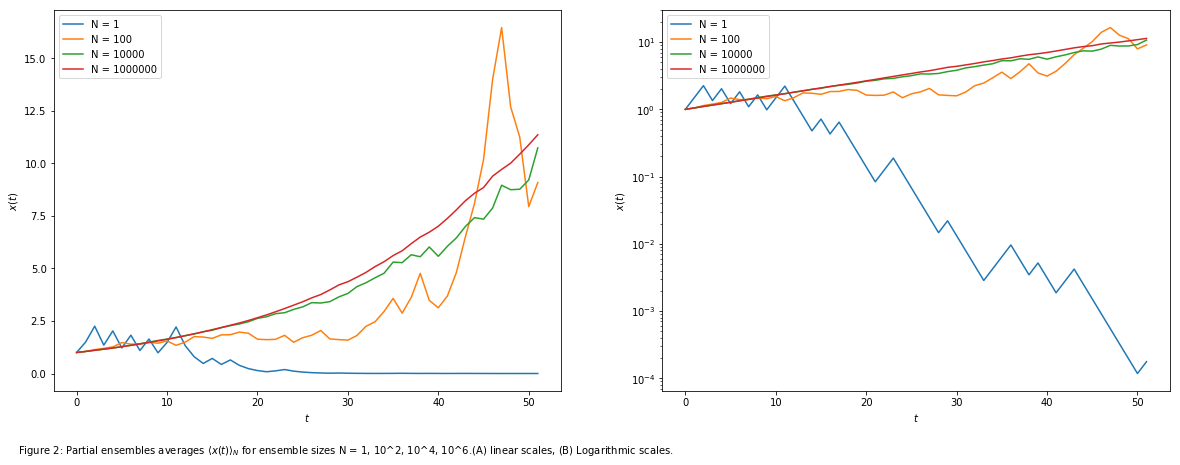

In [7]:
#Declare figure and subplots.
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#Plot all wealth trajectories.
for ensemble_average in ensemble_average_trajectories:
    ax1.plot(ensemble_average)
    ax2.plot(ensemble_average)

#Set axes labels.
ax1.set_ylabel('$x(t)$')
ax1.set_xlabel('$t$')

ax2.set_ylabel('$x(t)$')
ax2.set_xlabel('$t$')
ax2.set_yscale(value='log')

#Create legend.
legend = []

for group in num_trajectories:
    legend.append('N = {}'.format(group))

ax1.legend(legend)
ax2.legend(legend)

#Set figure text.
fig.text(0.1, 0.0,
         'Figure 2: Partial ensembles averages $\\langle x(t) \\rangle_N$ for ensemble sizes N = 1, 10^2, 10^4, 10^6.'\
         '(A) linear scales, (B) Logarithmic scales.',
         horizontalalignment='left', fontsize=10)

#Show figure.
plt.show()

### 1.1.2 Averaging over time

This subsection opens up with the idea that while it may have been tempting to conclude the risk is worth taking, does the ensemble after plotted above *necessitate* the conclusion? The answer is no, as explained below.

> Our critique will focus on the type of averaging we have applied -- we didn't play the game many times *in a row*, as would correspond to the real-world situation of repeating the game once a week for the result of your life. Instead we played the game *many times in parallel*, which corresponds to a different setup.

This section lays out a the motivation for a different type of analysis that is forthcoming. Before, in order to "zoom-out" and get a better understanding of the trend of wealth, we averaged over many simulated parallel wealth realizations (vertical zoom-out). Instead of performing this average of many systems, the notes suggest simply extending one system on a longer time horizon, say 10,040 intervals (horizontal zoom-out). Similarly to zooming out by including many trajectories, zooming out by increasing the duration of one system will diminish short-time fluctuations.

> If it seems counter-intuitive then this is because our intuition is built on so-called "ergodic processes", whereas $x$ is non-ergodic...Several important messages can be derived from the observation that an individual trajectory grows more slowly (or decays faster) over time than an average of a large ensemble.

#### Figure 3

There is no formula here, as the finite time-average formula is not derived until later. In this section, we simply extend the simulation model to a longer time horizon and plot two scaled, one linear and one log.

*PS: It is incredible that the trend can be analyzed by simply running it longer over time, which in 1.1.4, turns out to be a good estimate of the actual time average. But if one isn't convinced at this point in the notes, simulate a thousand trajectories (by setting `num_trajectories` to 1,000) over 1,040 time intervals. Notice, **not a single one** ends above the starting wealth.*

In [8]:
wealth_trajectories = wealthDynamics(initial_wealth=1, wealth_factors=[[0.6,1.5],[0.5,0.5]],
                                     duration=1000, num_trajectories=1)

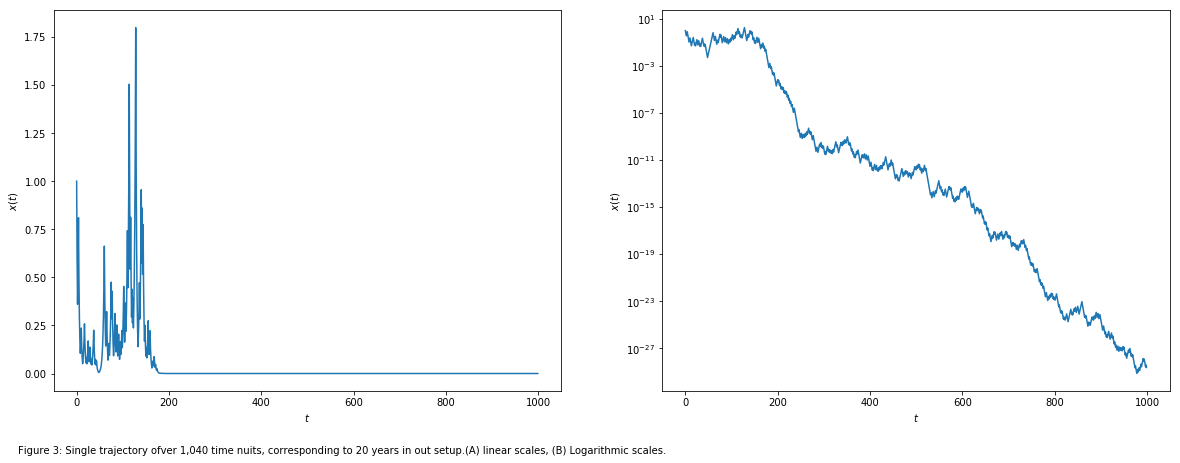

In [9]:
#Declare figure and subplots.
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#Plot all wealth trajectories.
for wealth_trajectory in wealth_trajectories:
    ax1.plot(wealth_trajectory)
    ax2.plot(wealth_trajectory)

#Set axes labels.
ax1.set_ylabel('$x(t)$')
ax1.set_xlabel('$t$')

ax2.set_ylabel('$x(t)$')
ax2.set_xlabel('$t$')
ax2.set_yscale(value='log')

#Set figure text.
fig.text(0.1, 0.0,
         'Figure 3: Single trajectory ofver 1,040 time nuits, corresponding to 20 years in out setup.'\
         '(A) linear scales, (B) Logarithmic scales.',
         horizontalalignment='left', fontsize=10)

#Show figure.
plt.show()

### 1.1.3 Expectation Model

This section analytically derives the average of $x(t)$ over many realizations, that is, the **expectation value** or the **ensemble average**. In various education settings, this quantity has traditionally been calculated as a weighted probability of gamble.

**Random Variable:**
* A set of possible values.
* A probability distribution over the set of possible vlaues.

To keep track of notation:
* $Z$ is the random variable and is uppercase. 
* $P_Z(z)$ is the probability density function of the random variable $Z$. Uppercase $Z$ tells us that the PDF is for the random variable $Z$ and the lowercase $z$ are realizations of $Z$, of which the PDF is a function of.

**Requirements:**
* $P_Z(z) \ge 0$, that is, always non-negative.
* $P_Z(z)$ is normalized such that $\int P_Z(z)\: \mathrm{d}z = 1$

**Definition 1:**  
The expectation value of a quantity $z$ is the large-ensemble limit of the finite-ensemble average,

$$\langle z \rangle = \lim_{N \to \infty} \langle z \rangle_N$$

**Definition 2:**  
The expectation value of a quantity $z$ that can take discrete values $z_j$ is the sum of all possible values weighted by their probabilities $p_j$, where $p_j$ is the probability of the $j^{th}$ value in the set, $z_j$.

$$\langle z \rangle = \sum_{j} p_j z_j$$

If $z$ is continuous, the expectation value is the integral
$$\langle z \rangle = \int_{-\infty}^{+\infty} s P_Z(z)\: \mathrm{d}z$$

Through the proof on page 10, the two definitions are the same:
$$\lim_{N \to \infty} \langle z \rangle_N = \sum_{j} p_j z_j$$

#### Excursion: Stochastic Process

In [10]:
wealth_trajectories = []

for i in range(0,5):
    wealth_trajectories.append(np.cumsum(np.random.standard_normal(size=40)))

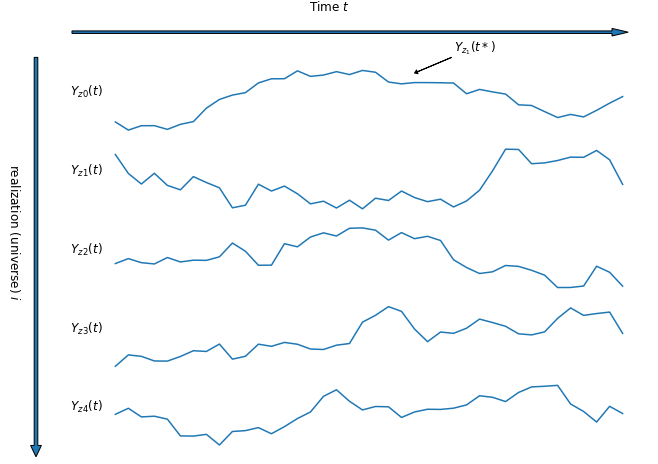

In [26]:
#Declare figure and subplots.
fig, ax = plt.subplots(5,1, figsize=(10,7))

#Plot each wealth trajectory.
for i, a in enumerate(ax):
    #Set y-label for each axis.
    a.set_ylabel("${Y_z}_" + str(i) + "(t)$", rotation='horizontal', fontsize=12)
    
    #Turn off the ticks and the tick labels for axis..
    a.tick_params(axis='both',which='both',
                  bottom=False, left=False,
                  labelbottom=False, labelleft=False)
    
    #Despine each axis.
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["bottom"].set_visible(False)
    a.spines["left"].set_visible(False)
    
    a.plot(wealth_trajectories[i])

#Annotate specific value for y_z1 realization.
ax[0].annotate("$Y_{z_1}(t*)$",
               xy=(23, 9),
               xytext=(26,13),
               arrowprops=dict(facecolor='black', width=0.001, headwidth=4, headlength=3),
               fontsize=12)

#Annotate trajectory for each process.
ax[0].annotate('Time $t$',
            xy=(0.5, 1), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='top',
            fontsize=12)

#Annotate realizations of the process at any time in the trajectory.
ax[0].annotate('realization (universe) $i$',
            xy=(0.01, 0.5), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='center', rotation=-90,
            fontsize=12)

#Annotate border arrows directly to the figure.
l1 = mpl.patches.FancyArrow(x=0.10, y=0.95,
                            dx=0.75, dy=0, width=0.005,
                            transform=fig.transFigure,
                            figure=fig)

l2 = mpl.patches.FancyArrow(x=0.05, y=0.9,
                            dx=0, dy=-0.77, width=0.005,
                            transform=fig.transFigure,
                            figure=fig)
fig.lines.extend([l1, l2])

#Show figure.
plt.show()

#### Analytical Expectation Value

Starting with the expectation:

$$\langle x(t + \delta t) \rangle = \langle x(t)r(t + \delta t) \rangle$$

Since $r(t + \delta t)$ is independent of $x(t)$, we can move it around as a separate term from $x(t)$, much like any other separate random variable or constant independent of another term in the equation, abbreviated to $\langle r \rangle$:
$$\langle x(t + \delta t) \rangle = \langle x(t) \rangle \langle r \rangle$$

If we define $\Delta t = T \delta t$, that is, total time spent gambling with T evenly spaced rounds:
$$x(1) = x(0) \langle r \rangle$$
$$x(2) = x(1) \langle r \rangle$$
$$x(2) = x(0) \langle r \rangle \langle r \rangle$$
$$x(2) = x(0) \langle r \rangle^{2}$$
$$...$$
$$x(T) = x(0) \langle r \rangle^{T}$$

Most generally, the expected value of our wealth $\langle x(t) \rangle$ at the end of our gambling session ($\Delta t$) is equal to our wealth at time $t + \Delta t$ multiplied by the expected value of $r$, our randomly generated factor, to the power of the number of (evenly spaced) rounds played during the one gambling session, $T$:

$$x(t + \Delta t) = x(t) \langle r \rangle^{T}$$

The expected value of $r(t)$ is $\langle r(t) \rangle$, which is equal to $\sum_{j} p_j r_j = \frac{1}{2} \times 0.6 + \frac{1}{2} \times 1.5 = 1.05.$

The expectation value $\langle r \rangle$ is greater than 1, therefore, $\langle x(t) \rangle$ grows exponentially in time by a factor of 1.05 each time unit. *Expressed as a continuous growth rate, $\frac{1}{\delta t} \ln \langle r \rangle = 4.9%$ per time unit.*

In [16]:
r = 1.05
T = 52

In [17]:
r_T = []

for i in range(0,T):
    r_T.append(r**i)

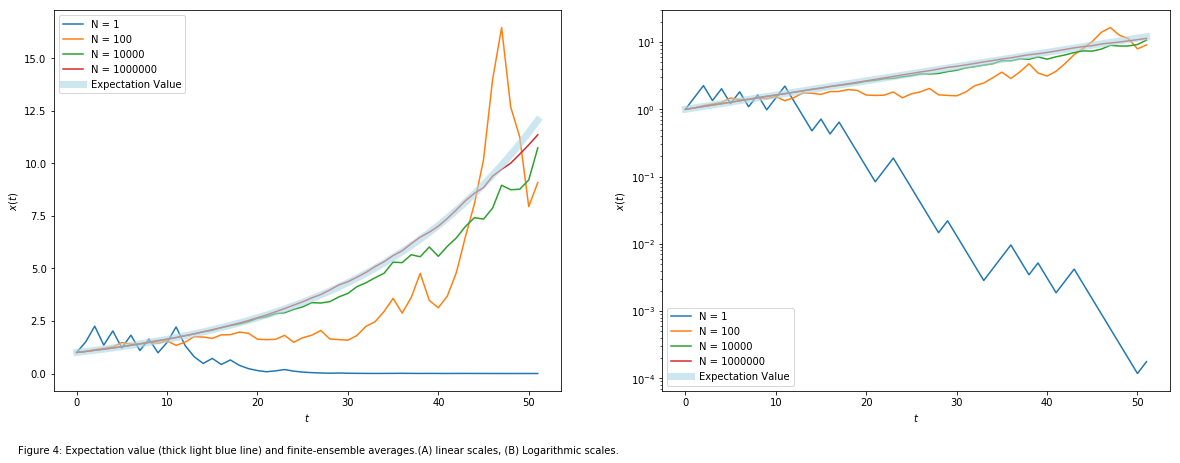

In [18]:
#Declare figure and subplots.
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#Plot all wealth trajectories.
for ensemble_average in ensemble_average_trajectories:
    ax1.plot(ensemble_average)
    ax2.plot(ensemble_average)

#Set axes labels.
ax1.set_ylabel('$x(t)$')
ax1.set_xlabel('$t$')

ax2.set_ylabel('$x(t)$')
ax2.set_xlabel('$t$')
ax2.set_yscale(value='log')

#Create legend.
legend = []

for group in num_trajectories:
    legend.append('N = {}'.format(group))

#Set figure text.
fig.text(0.1, 0.0,
         'Figure 4: Expectation value (thick light blue line) and finite-ensemble averages.'\
         '(A) linear scales, (B) Logarithmic scales.',
         horizontalalignment='left', fontsize=10)

#Add Expectation value to the plot
ax1.plot(r_T, linewidth=7, color='lightblue', alpha=0.6)
ax2.plot(r_T, linewidth=7, color='lightblue', alpha=0.6)
legend.append('Expectation Value')

ax1.legend(legend)
ax2.legend(legend)

#Show figure.
plt.show()

### 1.1.4 Time Average

In this section, the time average is computed analytically, like Figure 4. The goal is to use the analytical solution to validate the trend we saw when we extended one realization out to 1000 rounds (Figure 3). Personally, for me it is hard to understand since we did not compute any average in Figure 3, we merely extended one gambling session out really far.

As a dynamic set up with wealth at time $t + \Delta t$, where $\Delta t = T \delta t$,
$$x(t + \delta t) = x(t) \prod_{\tau=1}^{T} r(t+\tau \delta t)$$

From above, $r(t)$ has only two possible values, $r_{1}$ with probability $p_{1}$, and $r_{2}$ with probability $p_{2}$, where $p_{2} = 1 - p_{1}$. In addition, after any number of rounds of the gamble, a certain number of $r_{1}$ and $r_{2}$ values have taken place, allowing us to replace $\prod_{\tau=1}^{T} r(t+\tau \delta t) = r_{1}^{n_{1}} r_{2}^{n_{2}}$ where $n_{1} + n_{2} = T$.

$$x(t + \delta t) = x(t) r_{1}^{n_{1}} r_{2}^{n_{2}}$$

If we assign $r$ as the **effective factor** by which $x(t)$ is multiplied per round when the change is computer for a long time (this is an identical word set-up to an expectation value, just instead of ensemble, its time),

$$x(t + \Delta t) = x(t)\bar{r}^{T}$$

Solving for $\bar{r}$,

$$\bar{r}^{T} = \frac{x(t + \Delta t)}{x(t)}$$  
$$\bar{r} = \frac{x(t + \Delta t)}{x(t)}^{T}$$

If we take the limit (I do not understand the switch from $\Delta t$ to $T$),
$$\bar{r} = \lim_{\Delta t \to \infty}\frac{x(t + \Delta t)}{x(t)}^{T}$$  
$$\bar{r} = \lim_{\Delta t \to \infty}\frac{x(t) r_{1}^{n_{1}}r_{2}^{n_{2}}}{x(t)}^{T}$$  
$$\bar{r} = \lim_{T \to \infty}r_{1}^{n_{1}/T}r_{2}^{n_{2}/T}$$

With $p_{1} = n_{1}/T$ and $p_{2} = n_{2}/T$,
$$\lim_{T \to \infty}r_{1}^{n_{1}/T}r_{2}^{n_{2}/T} = r_{1}^{p_{1}}r_{2}^{p_{2}} = (r_{1}r_{2})^{1/2}$$

Finally, $(r_{1}r_{2})^{1/2} = (1.5*0.6)^{1/2} = (0.90)^{1/2} \approx 0.95$. *Since this number is smaller than one, there is a long-run decay for the individual trajectory*. Every trajectory will experience the same long run decay under the same dynamics, specifically, at a rate of $(r_{1}r_{2})^{1/2}$ per round.

In [45]:
r1_r2 = (0.90)**(1/2)

r_t = []

for i in range(0,10000):
    r_t.append(r1_r2**i)

In [36]:
wealth_trajectories = wealthDynamics(initial_wealth=1, wealth_factors=[[0.6,1.5],[0.5,0.5]],
                                     duration=10000, num_trajectories=1)

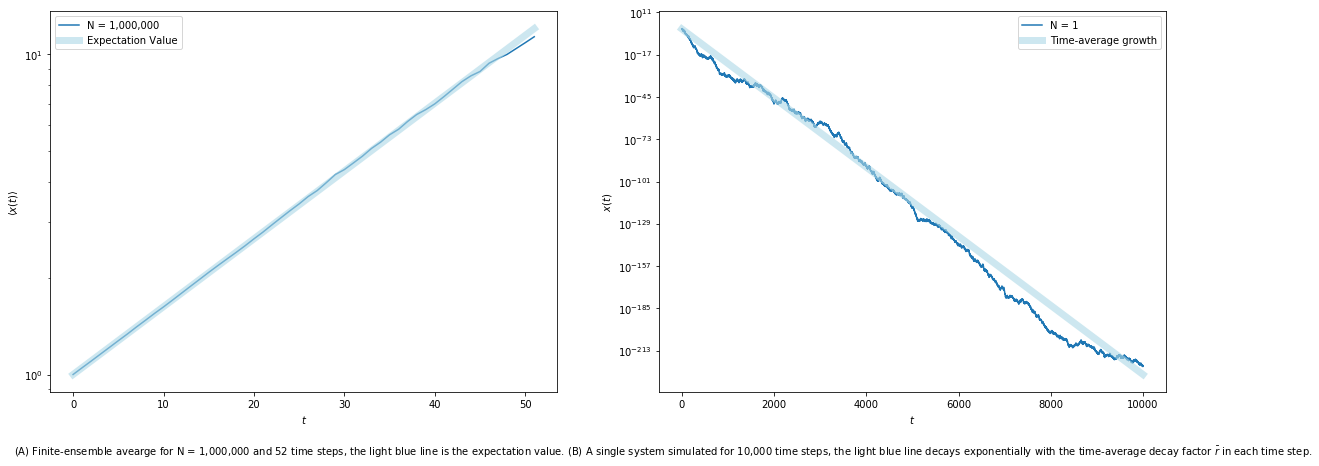

In [51]:
#Declare figure and subplots.
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#Plot ensemble average of 1,000,000 trajectory with expectation value.
ax1.plot(ensemble_average_trajectories[-1])
ax1.plot(r_T, linewidth=7, color='lightblue', alpha=0.6)

#Plot individual wealth trajectories with time-average.
ax2.plot(wealth_trajectories[0])
ax2.plot(r_t, linewidth=7, color='lightblue', alpha=0.6)

#Set X and Y labels.
ax1.set_ylabel('$ \\langle x(t) \\rangle $')
ax1.set_xlabel('$t$')
ax2.set_ylabel('$x(t)$')
ax2.set_xlabel('$t$')

#Set y-scales to log.
ax1.set_yscale(value='log')
ax2.set_yscale(value='log')

#Set Legends.
ax1.legend(['N = 1,000,000', 'Expectation Value'])
ax2.legend(['N = 1', 'Time-average growth'])

#Set figure text.
fig.text(0.1, 0.0,
         '(A) Finite-ensemble avearge for N = 1,000,000 and 52 time steps, the light blue line is the expectation value.'\
         ' (B) A single system simulated for 10,000 time steps, the light blue line decays exponentially with the time-average'\
         ' decay factor $ \\bar{r} $ in each time step.',
         horizontalalignment='left', fontsize=10)

#Show figure.
plt.show()